In [42]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [43]:
df = pd.read_csv('WHO-COVID-19-global-data.csv')
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
50635,2023-12-17,ZW,Zimbabwe,AFRO,50.0,266025,NaN,5730
50636,2023-12-24,ZW,Zimbabwe,AFRO,23.0,266048,1.0,5731
50637,2023-12-31,ZW,Zimbabwe,AFRO,-119.0,265929,-7.0,5724
50638,2024-01-07,ZW,Zimbabwe,AFRO,46.0,265975,3.0,5727


In [44]:
df.info() #get non empty row nums & data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50640 entries, 0 to 50639
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50640 non-null  object 
 1   Country_code       49163 non-null  object 
 2   Country            49374 non-null  object 
 3   WHO_region         45576 non-null  object 
 4   New_cases          36528 non-null  float64
 5   Cumulative_cases   50640 non-null  int64  
 6   New_deaths         24161 non-null  float64
 7   Cumulative_deaths  50640 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [45]:
df = df[df.Country_code.notnull()] # remove rows with no Country_code
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
50635,2023-12-17,ZW,Zimbabwe,AFRO,50.0,266025,NaN,5730
50636,2023-12-24,ZW,Zimbabwe,AFRO,23.0,266048,1.0,5731
50637,2023-12-31,ZW,Zimbabwe,AFRO,-119.0,265929,-7.0,5724
50638,2024-01-07,ZW,Zimbabwe,AFRO,46.0,265975,3.0,5727


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49163 entries, 0 to 50639
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49163 non-null  object 
 1   Country_code       49163 non-null  object 
 2   Country            49163 non-null  object 
 3   WHO_region         45365 non-null  object 
 4   New_cases          36345 non-null  float64
 5   Cumulative_cases   49163 non-null  int64  
 6   New_deaths         24032 non-null  float64
 7   Cumulative_deaths  49163 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ MB


In [47]:
df_2023 = df[~(df['Date_reported'] > '2023-01-01')] # get data for 2020-2023
df_2023 = df_2023[(df['Country_code'] == 'GB')] # get data for GB only
df_2023

C:\Users\William\AppData\Local\Temp\ipykernel_24824\3679804866.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2023 = df_2023[(df['Country_code'] == 'GB')] # get data for GB only


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
45154,2020-01-05,GB,United Kingdom of Great Britain and Northern I...,EURO,NaN,0,NaN,0
45155,2020-01-12,GB,United Kingdom of Great Britain and Northern I...,EURO,NaN,0,NaN,0
45156,2020-01-19,GB,United Kingdom of Great Britain and Northern I...,EURO,NaN,0,NaN,0
45157,2020-01-26,GB,United Kingdom of Great Britain and Northern I...,EURO,NaN,0,NaN,0
45158,2020-02-02,GB,United Kingdom of Great Britain and Northern I...,EURO,1.0,1,1.0,1
...,...,...,...,...,...,...,...,...
45306,2022-12-04,GB,United Kingdom of Great Britain and Northern I...,EURO,26105.0,24038341,374.0,213610
45307,2022-12-11,GB,United Kingdom of Great Britain and Northern I...,EURO,31048.0,24069389,450.0,214060
45308,2022-12-18,GB,United Kingdom of Great Britain and Northern I...,EURO,41009.0,24110398,522.0,214582
45309,2022-12-25,GB,United Kingdom of Great Britain and Northern I...,EURO,48639.0,24159037,763.0,215345


In [48]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 45154 to 45310
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      157 non-null    object 
 1   Country_code       157 non-null    object 
 2   Country            157 non-null    object 
 3   WHO_region         157 non-null    object 
 4   New_cases          153 non-null    float64
 5   Cumulative_cases   157 non-null    int64  
 6   New_deaths         151 non-null    float64
 7   Cumulative_deaths  157 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 11.0+ KB


<Axes: xlabel='Country_code'>

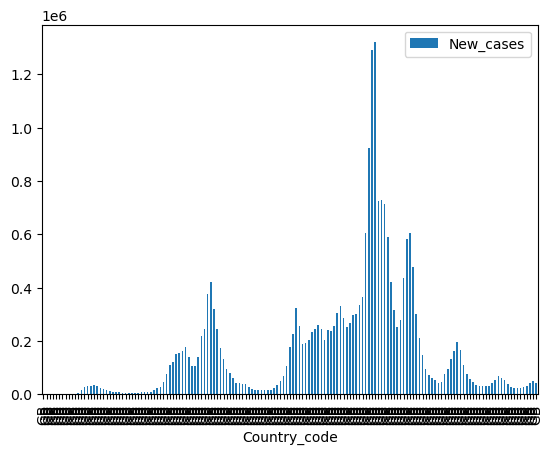

In [49]:
ax = df_2023.plot.bar(x='Country_code', y='New_cases')
ax